In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/loan_data.csv")

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [7]:
df.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# according to the datasets Gender, Dependents and self_employed have missing value being an object so we use mode()[0]

In [16]:
for i in ['Gender','Dependents','Self_Employed']:
  df[i]=df[i].fillna(df[i].mode()[0])

In [17]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Text(0.5, 1.0, 'histogram of loan amount term')

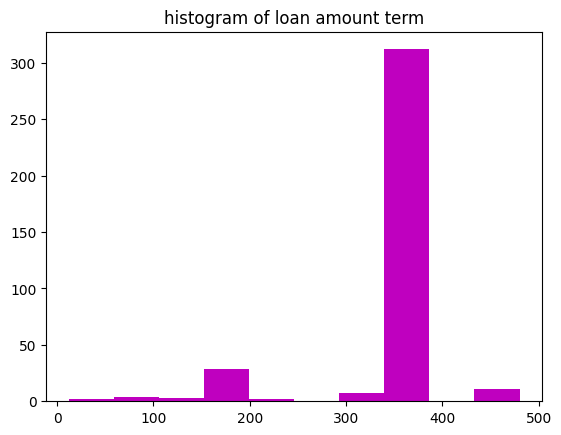

In [21]:
plt.hist(df['Loan_Amount_Term'],color="m")
plt.title("histogram of loan amount term")

# its a mean

Text(0.5, 1.0, 'hist of credit history')

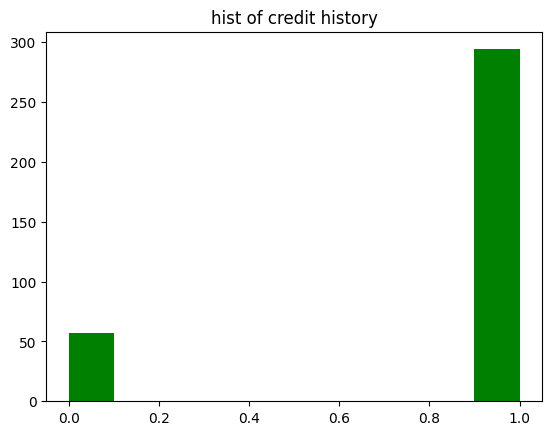

In [22]:
plt.hist(df['Credit_History'],color='green')
plt.title("hist of credit history")

# its a median

In [23]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [24]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [25]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

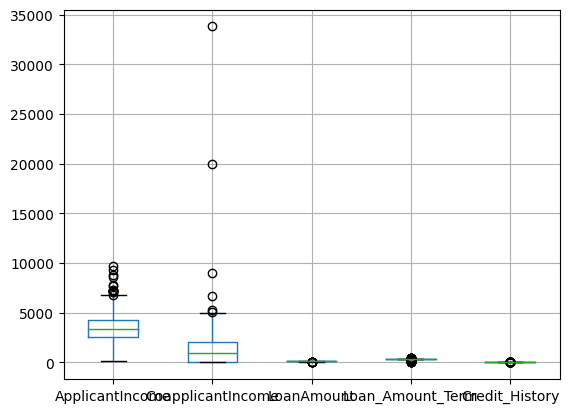

In [26]:
df.boxplot(fontsize=10)

<Axes: ylabel='CoapplicantIncome'>

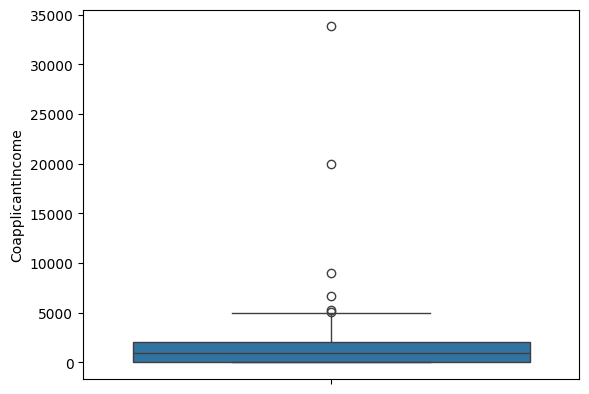

In [27]:
sns.boxplot(df['CoapplicantIncome'])

In [28]:
Q1 = np.percentile(df['CoapplicantIncome'],25,interpolation='midpoint')
Q2 = np.percentile(df['CoapplicantIncome'],50,interpolation='midpoint')
Q3 = np.percentile(df['CoapplicantIncome'],75,interpolation='midpoint')

IQR = Q3-Q1
print(IQR)

upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

print(upper_limit)
print(lower_limit)



2016.0
5040.0
-3024.0


In [56]:
outlier = []

for x in df['CoapplicantIncome']:
  if((x>upper_limit)):
    outlier.append(x)

In [57]:
outlier

[8980.0, 5063.0, 20000.0, 5302.0, 6666.0, 33837.0]

In [59]:
df1 = df['CoapplicantIncome']>upper_limit

In [60]:
df1

0      False
1      False
2      False
3      False
4      False
       ...  
376    False
377    False
378    False
379    False
380    False
Name: CoapplicantIncome, Length: 381, dtype: bool

In [61]:
df.loc[df1]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
79,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
110,LP001634,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,1.0,Rural,N
256,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
319,LP002618,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,1.0,Rural,N
324,LP002648,Male,Yes,0,Graduate,No,2130,6666.0,70.0,180.0,1.0,Semiurban,N
364,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N


In [62]:
df.loc[df1].index

Int64Index([79, 110, 256, 319, 324, 364], dtype='int64')

In [64]:
df.drop([79, 110, 256, 319, 324, 364],axis=0,inplace=True)


In [65]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [66]:
df.reset_index(inplace=True)

In [67]:
df.head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [68]:
df.drop('index',axis=1,inplace=True)

In [69]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
371,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
372,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
373,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


<Axes: ylabel='CoapplicantIncome'>

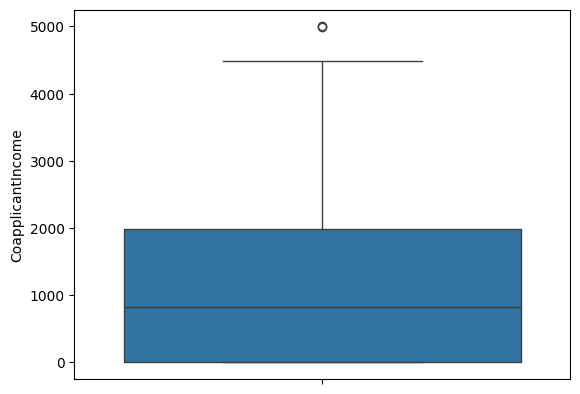

In [70]:
sns.boxplot(df['CoapplicantIncome'])

In [71]:
# encoding

In [72]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [73]:
df.nunique()

Loan_ID              375
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      317
CoapplicantIncome    176
LoanAmount           101
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [74]:
df = df.drop('Loan_ID',axis=1)

In [75]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [88]:
for i in ['Gender','Dependents','Married','Education','Self_Employed','Property_Area','Loan_Status']:
  df[i]= le.fit_transform(df[i])

In [89]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [90]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.361064,0.223770,0.112804,-0.003518,0.035784,0.168556,0.063817,-0.113725,0.008183,0.005777,0.032045
Married,0.361064,1.000000,0.387799,0.030958,-0.001748,-0.056795,0.316649,0.142232,-0.131327,0.026747,0.037362,0.095396
Dependents,0.223770,0.387799,1.000000,0.109956,0.049826,0.135052,-0.032902,0.083304,-0.103691,-0.001651,0.023585,0.009051
Education,0.112804,0.030958,0.109956,1.000000,0.030489,-0.045554,-0.006675,-0.020413,-0.100003,0.003901,-0.082358,-0.055469
Self_Employed,-0.003518,-0.001748,0.049826,0.030489,1.000000,0.224287,-0.076693,0.025622,-0.066677,0.031550,-0.034812,-0.022529
ApplicantIncome,0.035784,-0.056795,0.135052,-0.045554,0.224287,1.000000,-0.333188,0.267565,-0.113023,-0.005205,-0.065307,-0.020554
CoapplicantIncome,0.168556,0.316649,-0.032902,-0.006675,-0.076693,-0.333188,1.000000,0.265785,-0.009399,0.030487,-0.037470,0.143258
LoanAmount,0.063817,0.142232,0.083304,-0.020413,0.025622,0.267565,0.265785,1.000000,0.116802,-0.037794,-0.166897,0.032140
Loan_Amount_Term,-0.113725,-0.131327,-0.103691,-0.100003,-0.066677,-0.113023,-0.009399,0.116802,1.000000,-0.013993,-0.099691,-0.055330
Credit_History,0.008183,0.026747,-0.001651,0.003901,0.031550,-0.005205,0.030487,-0.037794,-0.013993,1.000000,0.039702,0.634224


<Axes: >

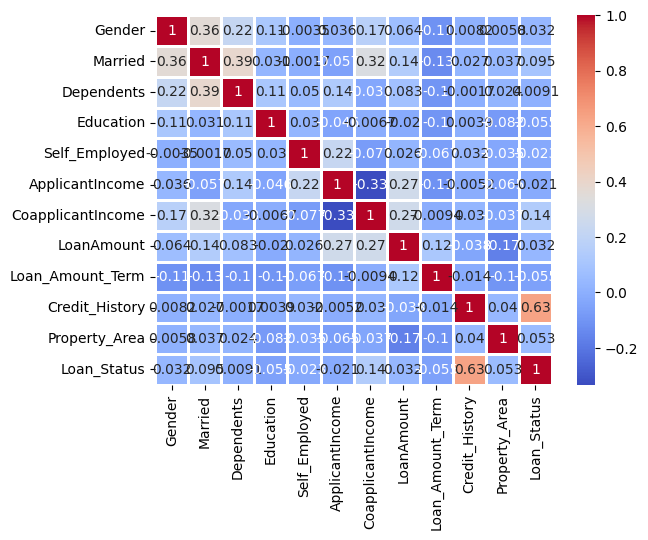

In [91]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidth=2,)

In [ ]:
# scaling

In [92]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [93]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
370,1,1,3,0,0,5703,0.0,128.0,360.0,1.0,2,1
371,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
372,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
373,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
374,0,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,0


In [94]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [85]:
df.Credit_History.nunique()

2

In [95]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [98]:
 x = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
 y = df.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [99]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,4583,1508.0,128.0,360.0
1,3000,0.0,66.0,360.0
2,2583,2358.0,120.0,360.0
3,6000,0.0,141.0,360.0
4,2333,1516.0,95.0,360.0


In [100]:
y.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,1.0,0,0
1,1,1,0,0,1,1.0,2,1
2,1,1,0,1,0,1.0,2,1
3,1,0,0,0,0,1.0,2,1
4,1,1,0,1,0,1.0,2,1


In [101]:
newx = minmax.fit_transform(x)

In [102]:
x = pd.DataFrame(newx,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])

In [103]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.464043,0.3016,0.843972,0.74359
1,0.298336,0.0000,0.404255,0.74359
2,0.254684,0.4716,0.787234,0.74359
3,0.612373,0.0000,0.936170,0.74359
4,0.228515,0.3032,0.609929,0.74359


In [104]:
df = pd.concat([y,x],axis=1)

In [105]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,1,1,0,0,1.0,0,0,0.464043,0.3016,0.843972,0.74359
1,1,1,0,0,1,1.0,2,1,0.298336,0.0000,0.404255,0.74359
2,1,1,0,1,0,1.0,2,1,0.254684,0.4716,0.787234,0.74359
3,1,0,0,0,0,1.0,2,1,0.612373,0.0000,0.936170,0.74359
4,1,1,0,1,0,1.0,2,1,0.228515,0.3032,0.609929,0.74359


In [106]:
# SVM algorithm as classifier SVC
# loan_status is the output

In [109]:
x = df.drop('Loan_Status',axis=1)
x1 = pd.DataFrame(x)
y = df['Loan_Status']
y1 = pd.DataFrame(y)

In [110]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=42)

In [119]:
from sklearn.svm import SVC

In [120]:
svm = SVC(kernel='rbf')

In [121]:
model = svm.fit(x1_train,y1_train)
y1_pred = model.predict(x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [122]:
print(x1_test)
print(y1_pred)

     Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
167       1        0           0          0              0             1.0   
33        1        1           1          0              0             1.0   
15        1        1           0          1              0             0.0   
316       1        1           0          1              0             1.0   
57        0        0           0          0              0             1.0   
..      ...      ...         ...        ...            ...             ...   
110       0        1           0          0              0             1.0   
277       0        1           0          1              1             1.0   
60        1        1           2          1              0             1.0   
158       1        1           3          0              0             1.0   
265       1        1           0          0              0             1.0   

     Property_Area  ApplicantIncome  CoapplicantIncome  LoanAmo

In [123]:
print(y1_test)

     Loan_Status
167            1
33             1
15             0
316            1
57             1
..           ...
110            1
277            1
60             1
158            0
265            1

[94 rows x 1 columns]


In [124]:
# checking the accuracy


In [125]:
from sklearn.metrics import accuracy_score
print("the accuracy score is:",accuracy_score(y1_test,y1_pred))

the accuracy score is: 0.8617021276595744


In [126]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,1,1,0,0,1.0,0,0.464043,0.3016,0.843972,0.74359
1,1,1,0,0,1,1.0,2,0.298336,0.0000,0.404255,0.74359
2,1,1,0,1,0,1.0,2,0.254684,0.4716,0.787234,0.74359
3,1,0,0,0,0,1.0,2,0.612373,0.0000,0.936170,0.74359
4,1,1,0,1,0,1.0,2,0.228515,0.3032,0.609929,0.74359


In [127]:
model.predict([[1,	1,	1,	0,	0,	1.0,	0,	0.464043,	0.3016,	0.843972,	0.74359]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])